In [2]:
import pandas as pd
import geopandas as gpd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para los gráficos
sns.set_style("whitegrid")

# Cargar nuestro dataset final y enriquecido
RUTA_DATOS_PROCESADOS = os.path.join('..', '1_datos', '02_procesados')
RUTA_GPKG_ENRIQUECIDO = os.path.join(RUTA_DATOS_PROCESADOS, 'gdf_maestro_enriquecido.gpkg')
gdf = gpd.read_file(RUTA_GPKG_ENRIQUECIDO)

print("GeoDataFrame enriquecido cargado. ¡Comienza la auditoría!")
print(f"Dimensiones: {gdf.shape}")

GeoDataFrame enriquecido cargado. ¡Comienza la auditoría!
Dimensiones: (65, 255)


In [3]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 65 entries, 0 to 64
Columns: 255 entries, ID to geometry
dtypes: float64(29), geometry(1), int64(224), object(1)
memory usage: 129.6+ KB


In [4]:
# --- Celda 2 Modificada ---

print("--- Estadísticas Descriptivas de Todas las Variables Numéricas ---")

pd.set_option('display.max_rows', None)


display(gdf.describe().T)

# --- (Opcional) Restablecer la configuración ---
# Si quieres que pandas vuelva a su comportamiento normal para el resto del notebook,
# puedes restablecer la opción después de haberla usado.
# pd.reset_option('display.max_rows')

--- Estadísticas Descriptivas de Todas las Variables Numéricas ---


,count,mean,std,min,25%,50%,75%,max
ID,65.0,226.000000,18.907670,194.000000,210.000000,226.000000,242.000000,258.000000
ENTIDAD,65.0,6.000000,0.000000,6.000000,6.000000,6.000000,6.000000,6.000000
DISTRITO_F,65.0,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000
DISTRITO_L,65.0,12.153846,1.716016,9.000000,11.000000,13.000000,13.000000,14.000000
MUNICIPIO,65.0,8.000000,0.000000,8.000000,8.000000,8.000000,8.000000,8.000000
seccion,65.0,233.830769,20.924395,200.000000,216.000000,232.000000,253.000000,269.000000
TIPO,65.0,2.430769,0.728209,2.000000,2.000000,2.000000,3.000000,4.000000
CONTROL,65.0,229.107692,46.103865,172.000000,201.000000,217.000000,235.000000,383.000000
GEOMETRY1_,65.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
lista_nominal_promedio,65.0,445.530970,113.150795,94.800000,390.125000,476.645833,515.916667,600.930556


--- Distribución de Variables Clave ---


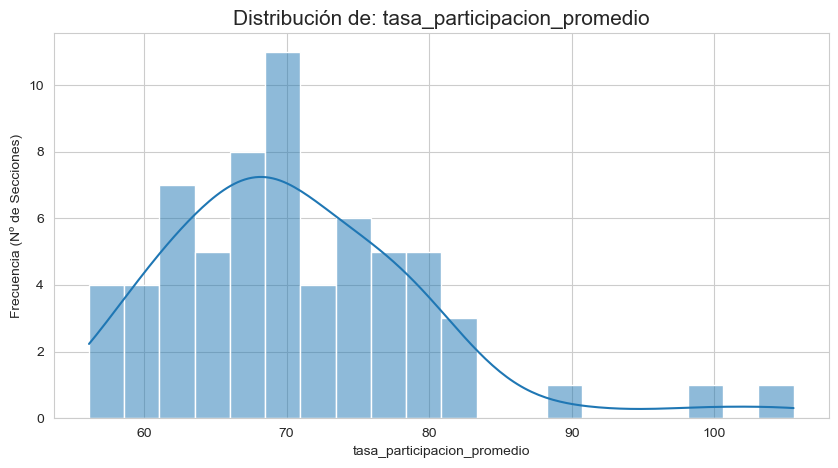

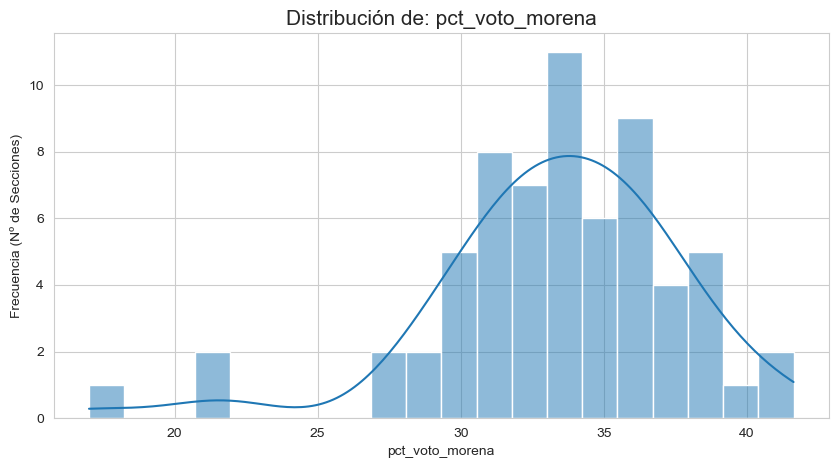

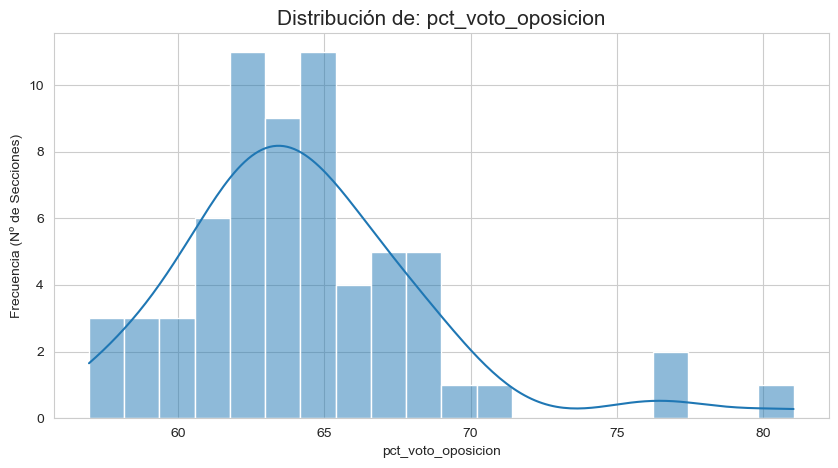

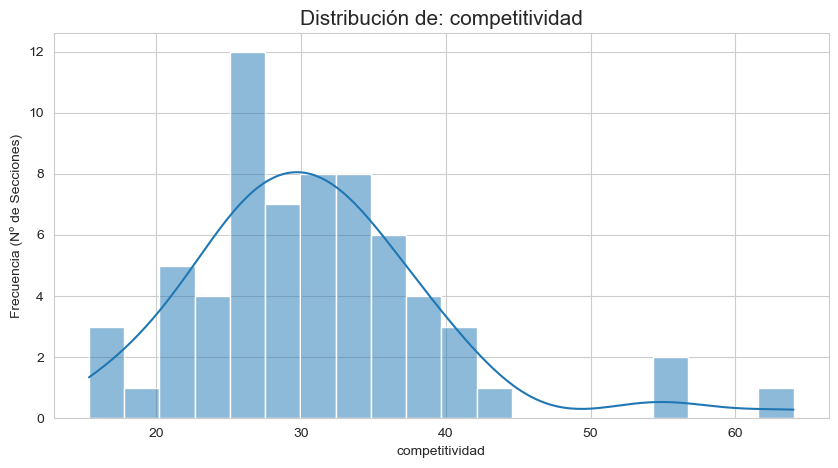

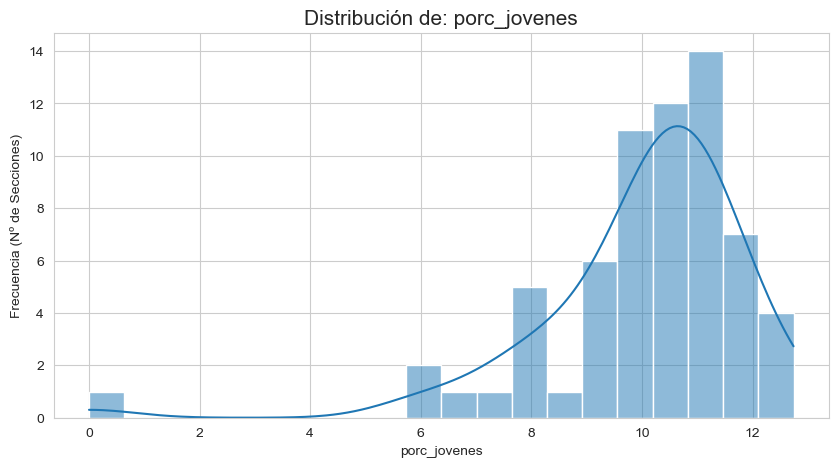

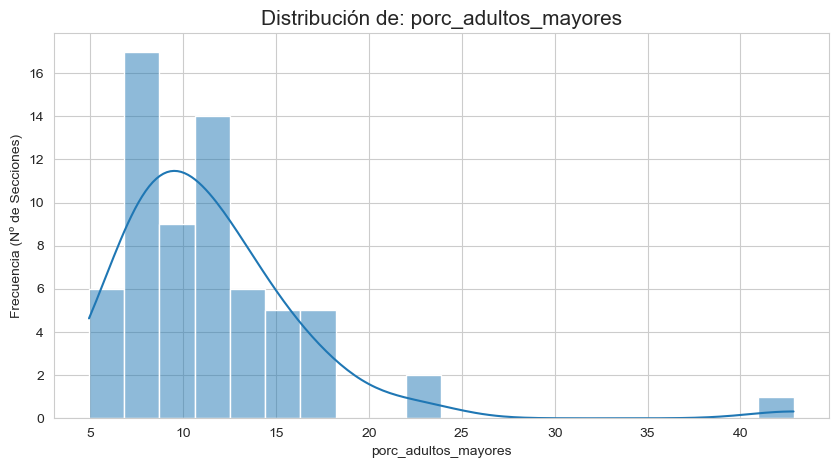

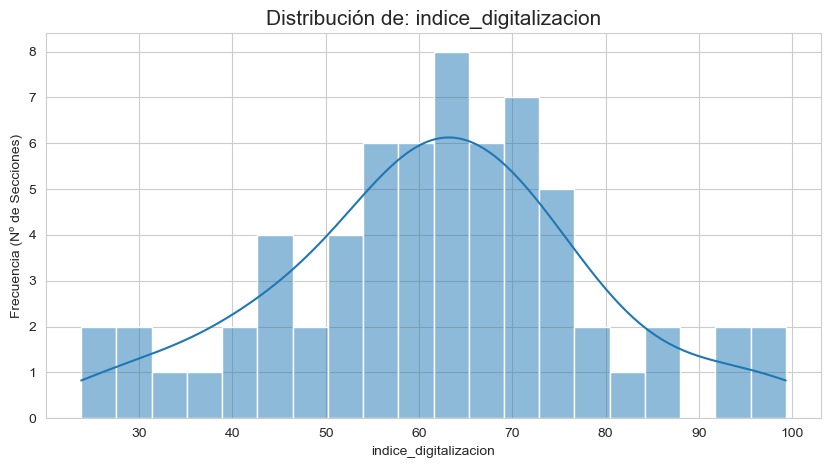

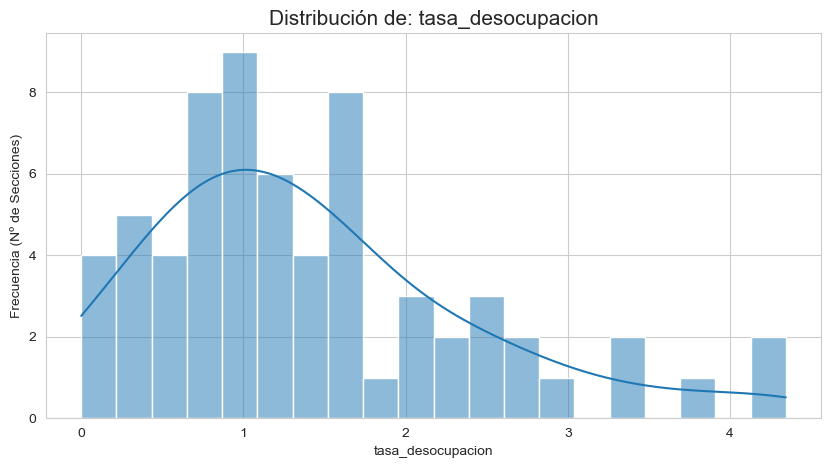

In [5]:
# Lista de columnas clave para visualizar
columnas_a_visualizar = [
    'tasa_participacion_promedio',
    'pct_voto_morena',
    'pct_voto_oposicion',
    'competitividad',
    'porc_jovenes',
    'porc_adultos_mayores',
    'grado_escolaridad_promedio',
    'indice_digitalizacion',
    'tasa_desocupacion'
]

# Creamos los histogramas
print("--- Distribución de Variables Clave ---")
for col in columnas_a_visualizar:
    if col in gdf.columns:
        plt.figure(figsize=(10, 5))
        sns.histplot(gdf[col], kde=True, bins=20)
        plt.title(f'Distribución de: {col}', fontsize=15)
        plt.xlabel(col)
        plt.ylabel('Frecuencia (Nº de Secciones)')
        plt.show()

In [6]:
print("--- Búsqueda de Secciones con Datos Anómalos ---")

# 1. Tasa de participación > 100% o < 0% (lo más crítico)
participacion_invalida = gdf[(gdf['tasa_participacion_promedio'] > 100) | (gdf['tasa_participacion_promedio'] < 0)]
if not participacion_invalida.empty:
    print(f"\n[!] Se encontraron {len(participacion_invalida)} secciones con tasa de participación inválida:")
    display(participacion_invalida[['seccion', 'lista_nominal_promedio', 'votos_totales_acumulados', 'tasa_participacion_promedio']])
else:
    print("\n[✅] Todas las secciones tienen una tasa de participación válida (0-100%).")

# 2. Búsqueda general de cualquier columna de porcentaje fuera del rango 0-100
columnas_pct = [col for col in gdf.columns if 'porc_' in col or 'pct_' in col or 'tasa_' in col]
anomalias_pct = pd.DataFrame()

for col in columnas_pct:
    # Filtramos por valores fuera del rango lógico [0, 100]
    anomalias_en_columna = gdf[(gdf[col] < 0) | (gdf[col] > 100)]
    if not anomalias_en_columna.empty:
        print(f"\n[!] Se encontraron anomalías en la columna '{col}':")
        display(anomalias_en_columna[['seccion', col]])
        
if anomalias_pct.empty and participacion_invalida.empty:
     print("\n[✅] Todas las columnas de porcentaje están dentro del rango lógico (0-100%).")

--- Búsqueda de Secciones con Datos Anómalos ---

[!] Se encontraron 1 secciones con tasa de participación inválida:


,seccion,lista_nominal_promedio,votos_totales_acumulados,tasa_participacion_promedio
41,241,273.188679,15286,105.566298



[!] Se encontraron anomalías en la columna 'tasa_participacion_promedio':


,seccion,tasa_participacion_promedio
41,241,105.566298



[!] Se encontraron anomalías en la columna 'porc_con_celular':


,seccion,porc_con_celular
0,254,110.937500
1,255,107.407407
4,200,108.588957
5,203,110.389610
6,204,107.920792
8,214,100.579710
9,206,109.775967
10,207,109.848485
11,208,100.684932
12,209,108.433735


In [7]:
# --- Exploración de Secciones con Población Anómalamente Baja ---
print("--- Buscando secciones con población total muy baja ---")

# Definimos un umbral. 50 personas es un mínimo razonable para tener algo de estabilidad estadística.
UMBRAL_POBLACION_MINIMA = 50

secciones_poca_poblacion = gdf[gdf['POBTOT'] <= UMBRAL_POBLACION_MINIMA]

if not secciones_poca_poblacion.empty:
    print(f"\n[!] Se encontraron {len(secciones_poca_poblacion)} secciones con población <= {UMBRAL_POBLACION_MINIMA}:")
    # Mostramos algunas columnas clave para entender el contexto
    display(secciones_poca_poblacion[['seccion', 'POBTOT', 'lista_nominal_promedio', 'votos_totales_acumulados', 'tasa_participacion_promedio']])
else:
    print(f"\n[✅] Todas las secciones tienen una población superior a {UMBRAL_POBLACION_MINIMA}.")

--- Buscando secciones con población total muy baja ---

[!] Se encontraron 1 secciones con población <= 50:


,seccion,POBTOT,lista_nominal_promedio,votos_totales_acumulados,tasa_participacion_promedio
2,201,7,94.8,1281,90.021082


In [8]:
# --- Exploración de Secciones con Tasas de Participación Atípicas ---
print("--- Buscando secciones con tasas de participación > 90% ---")

UMBRAL_PARTICIPACION_ALTA = 90.0

secciones_participacion_alta = gdf[gdf['tasa_participacion_promedio'] >= UMBRAL_PARTICIPACION_ALTA]

if not secciones_participacion_alta.empty:
    print(f"\n[!] Se encontraron {len(secciones_participacion_alta)} secciones con participación >= {UMBRAL_PARTICIPACION_ALTA}%:")
    # Mostramos las columnas que componen el cálculo para entender el porqué
    display(secciones_participacion_alta[['seccion', 'lista_nominal_promedio', 'votos_totales_acumulados', 'tasa_participacion_promedio']].sort_values('tasa_participacion_promedio', ascending=False))
else:
    print(f"\n[✅] No se encontraron secciones con participación superior al {UMBRAL_PARTICIPACION_ALTA}%.")

--- Buscando secciones con tasas de participación > 90% ---

[!] Se encontraron 3 secciones con participación >= 90.0%:


,seccion,lista_nominal_promedio,votos_totales_acumulados,tasa_participacion_promedio
41,241,273.188679,15286,105.566298
48,247,151.425000,5989,98.861010
2,201,94.800000,1281,90.021082


In [9]:
# --- Proceso de Limpieza y Creación del Dataset Filtrado ---
print(f"Número de secciones antes de la limpieza: {len(gdf)}")

# Regla 1: Excluir secciones con población por debajo del umbral
gdf_limpio = gdf[gdf['POBTOT'] > UMBRAL_POBLACION_MINIMA].copy()
print(f"Número de secciones después de filtrar por población mínima: {len(gdf_limpio)}")

# Regla 2: Excluir secciones con participación imposible (>100%)
gdf_limpio = gdf_limpio[gdf_limpio['tasa_participacion_promedio'] <= 100].copy()
print(f"Número de secciones después de filtrar por participación imposible: {len(gdf_limpio)}")

print("\n[✅] Proceso de limpieza de filas completado.")

Número de secciones antes de la limpieza: 65
Número de secciones después de filtrar por población mínima: 64
Número de secciones después de filtrar por participación imposible: 63

[✅] Proceso de limpieza de filas completado.


In [10]:
# --- Paso 3.1: Corrección de Porcentajes Imposibles (Capping) ---
print("--- Corrigiendo porcentajes por encima de 100% (Capping) ---")

# Identificamos las columnas de porcentaje que podrían estar afectadas
# Por ahora, solo hemos detectado 'porc_con_celular', pero podemos añadir más si es necesario.
columnas_a_revisar = ['porc_con_celular'] 

# Usaremos gdf_limpio, que es el resultado del Paso 3 (limpieza de filas)
for col in columnas_a_revisar:
    if col in gdf_limpio.columns:
        # Contamos cuántas secciones están afectadas antes de corregir
        secciones_afectadas = gdf_limpio[gdf_limpio[col] > 100]
        if not secciones_afectadas.empty:
            print(f"[!] Se encontraron {len(secciones_afectadas)} secciones con '{col}' > 100%.")

            # Aplicar el capping: cualquier valor > 100 se convierte en 100
            gdf_limpio.loc[gdf_limpio[col] > 100, col] = 100
            print(f"    -> Valores en '{col}' han sido acotados a 100.")

# IMPORTANTE: Recalculamos los índices que dependen de las variables corregidas
if 'indice_digitalizacion' in gdf_limpio.columns:
    gdf_limpio['indice_digitalizacion'] = gdf_limpio[['porc_con_pc', 'porc_con_celular', 'porc_con_internet']].mean(axis=1)
    print("\n[✅] El 'indice_digitalizacion' ha sido recalculado con los datos corregidos.")

--- Corrigiendo porcentajes por encima de 100% (Capping) ---
[!] Se encontraron 22 secciones con 'porc_con_celular' > 100%.
    -> Valores en 'porc_con_celular' han sido acotados a 100.

[✅] El 'indice_digitalizacion' ha sido recalculado con los datos corregidos.


In [11]:
# --- Selección Final de Columnas (Dataset Enfocado) ---

# Lista de columnas de identificación y geográficas que queremos conservar
columnas_base = ['seccion', 'geometry']

# Lista de columnas electorales clave
columnas_electorales = [
    'lista_nominal_promedio', 'votos_totales_acumulados', 'partido_dominante',
    'pct_voto_morena', 'tasa_participacion_promedio', 'pct_voto_oposicion', 'competitividad'
]

# Lista de los atributos de los 4 pilares que creamos
columnas_pilares = [
    'porc_genero_fem', 'porc_ninos', 'porc_futuros_votantes', 'porc_jovenes', 'porc_adultos_mayores',
    'porc_piso_tierra', 'porc_con_auto', 'porc_con_pc', 'porc_con_celular', 'porc_con_internet',
    'indice_digitalizacion', 'GRAPROES',
    'porc_hogares_jefa_mujer', 'porc_poblacion_migrante',
    'tasa_desocupacion', 'porc_sin_servicios_salud'
]

# Unimos todas las listas, asegurándonos de que solo incluimos columnas que realmente existen
columnas_finales = columnas_base + columnas_electorales + columnas_pilares
columnas_a_seleccionar = [col for col in columnas_finales if col in gdf_limpio.columns]

# Creamos nuestro DataFrame final
gdf_final = gdf_limpio[columnas_a_seleccionar]

print("--- Dataset Final Creado ---")
print(f"Dimensiones finales: {gdf_final.shape}")
display(gdf_final.info())

--- Dataset Final Creado ---
Dimensiones finales: (63, 25)
<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 63 entries, 0 to 64
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   seccion                      63 non-null     int64   
 1   geometry                     63 non-null     geometry
 2   lista_nominal_promedio       63 non-null     float64 
 3   votos_totales_acumulados     63 non-null     int64   
 4   partido_dominante            63 non-null     object  
 5   pct_voto_morena              63 non-null     float64 
 6   tasa_participacion_promedio  63 non-null     float64 
 7   pct_voto_oposicion           63 non-null     float64 
 8   competitividad               63 non-null     float64 
 9   porc_genero_fem              63 non-null     float64 
 10  porc_ninos                   63 non-null     float64 
 11  porc_futuros_votantes        63 non-null     float64 
 12  porc

None

In [12]:
# --- Celda 2 Modificada ---

print("--- Estadísticas Descriptivas de Todas las Variables Numéricas ---")

pd.set_option('display.max_rows', None)


display(gdf_final.describe().T)

# --- (Opcional) Restablecer la configuración ---
# Si quieres que pandas vuelva a su comportamiento normal para el resto del notebook,
# puedes restablecer la opción después de haberla usado.
# pd.reset_option('display.max_rows')

--- Estadísticas Descriptivas de Todas las Variables Numéricas ---


,count,mean,std,min,25%,50%,75%,max
seccion,63.0,234.238095,20.822378,200.000000,216.500000,232.000000,253.500000,269.000000
lista_nominal_promedio,63.0,453.833720,103.358250,151.425000,398.889293,478.458333,522.900194,600.930556
votos_totales_acumulados,63.0,17401.952381,9532.342738,3681.000000,9955.000000,15475.000000,22326.500000,52553.000000
pct_voto_morena,63.0,33.499186,3.809660,21.530027,31.289126,33.621024,35.768981,41.624930
tasa_participacion_promedio,63.0,69.784829,7.805845,56.140967,63.867556,68.983352,75.328193,98.861010
pct_voto_oposicion,63.0,64.135201,3.786138,56.968215,61.923921,63.673169,65.983911,76.464386
competitividad,63.0,30.636015,7.571378,15.343285,26.163343,30.184191,34.584558,54.723303
porc_genero_fem,63.0,49.903976,1.617603,46.368715,49.010203,49.962990,50.726512,55.037313
porc_ninos,63.0,13.552044,2.301131,8.030303,12.313785,13.799283,14.910168,18.614719
porc_futuros_votantes,63.0,4.681643,0.848313,2.424242,4.110108,4.691989,5.185154,7.366227


In [13]:
# --- Guardar el Dataset Final y Auditado ---
RUTA_SALIDA_FINAL = os.path.join(RUTA_DATOS_PROCESADOS, 'gdf_final_auditado.gpkg')

try:
    gdf_final.to_file(RUTA_SALIDA_FINAL, driver='GPKG')
    print(f"¡Éxito! Dataset final y auditado guardado en:")
    print(RUTA_SALIDA_FINAL)
except Exception as e:
    print(f"Ocurrió un error al guardar el archivo: {e}")

¡Éxito! Dataset final y auditado guardado en:
../1_datos/02_procesados/gdf_final_auditado.gpkg
